___


# <font color= #90546f> **Proyecto Taller de Modelado de Datos** </font>
- <Strong> `ESTEBAN GÓMEZ, AISSA GONZALEZ Y SARAH BELTRAN` </Strong>
- <Strong> Año </Strong>: 2024
___



## <font color= #90546f> **Proyecto Clasificación** </font>
#### <font color= #90546f> Bank Marketing UCI Dataset </font>


Fuente del Dataset:
Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.



## <font color= #819161> Definición del problema </font>


### <font color= #bbc99f> Introducción </font>

<p style="text-align: justify;">
Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaban en llamadas telefónicas. A menudo, era necesario más de un contacto con el mismo cliente para saber si el producto (depósito a plazo fijo bancario) estaría suscrito ('sí') o no ('no').
</p>



### <font color= #bbc99f> Objetivo </font>

<p style="text-align: justify;">
El objetivo del proyecto de clasificación es predecir si el cliente suscribirá (sí/no) un depósito a plazo (variable y). Tomando en cuenta los datos personales que se recopilan con los de la 
</p>



### <font color= #bbc99f> Features </font>

1. Age: valor numerico de la edad del cliente.
2. Job : Tipo de trabajo que tiene por categorias el cliente o su ocupación.
3. Marital : su estado civil, casado, soltero, divorciado o desconocido.
4. Education: nivel educativo mas aldo que tiene desde educacion basica de 4to hasta la universidad.
5. Default: si tienen un credito por defecto.
6. Housing: si tiene un credito hipotecario actualmente
7. Loan: si tiene un credito personal actualmente
8. Contact: tipo de medio de comunicacion
9. Day_of_week: dia de la semana del ultimo contacto
10. Month: mes del ultimo contacto
11. Duration: duracion del ultimo contacto en segundos
12. Campaign: cantidad de contactos hechos hacia este cliente durante la campaña
13. Pdays: numero de dias que han pasado desde el ultimo contacto de una campaña previa
14. Previous: numero de contactos hechos antes de esta campaña y a este cliente
15. Poutcome: resultado de campañas de marketing anteriores

## <font color= #819161> Entrega 1: Exploración de datos (EDA) </font>
___ 



### <font color= #bbc99f> Carga de Dataset y Librerias

In [74]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 


### <font color= #bbc99f> Estadistica Basica

In [75]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [76]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [77]:
#Acerca de la base de datos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [78]:
#Estadistica del df
X.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN


___
### <font color= #bbc99f> Datos Nulos y Limpieza.

In [79]:
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [80]:
columnas_selec = ['job', 'education', 'contact', 'poutcome']
X[columnas_selec].dtypes

job          object
education    object
contact      object
poutcome     object
dtype: object

Ahora, como todas son categoricas vamos a sustiturilas con la moda.

In [81]:
X.loc[:, columnas_selec] = X[columnas_selec].fillna(X[columnas_selec].mode().iloc[0])
X.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [82]:
duplicates = X.duplicated().sum()
print("Número de filas duplicadas:", duplicates)

Número de filas duplicadas: 0


Por lo tanto no tendremos que eliminar ninguna fila por duplicados, pero eliminaremos la de poutcome dado a que tiene muchos nans

In [83]:
X = X.drop(columns=['poutcome'])
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous'],
      dtype='object')

___
### <font color= #bbc99f> Graficas (Dist. Datos).

In [84]:
numericas = X.select_dtypes(include=['number']).columns.tolist()
categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()
print('Columnas numericas: ', numericas)
print('Columnas categoricas: ', categoricas)

Columnas numericas:  ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Columnas categoricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']


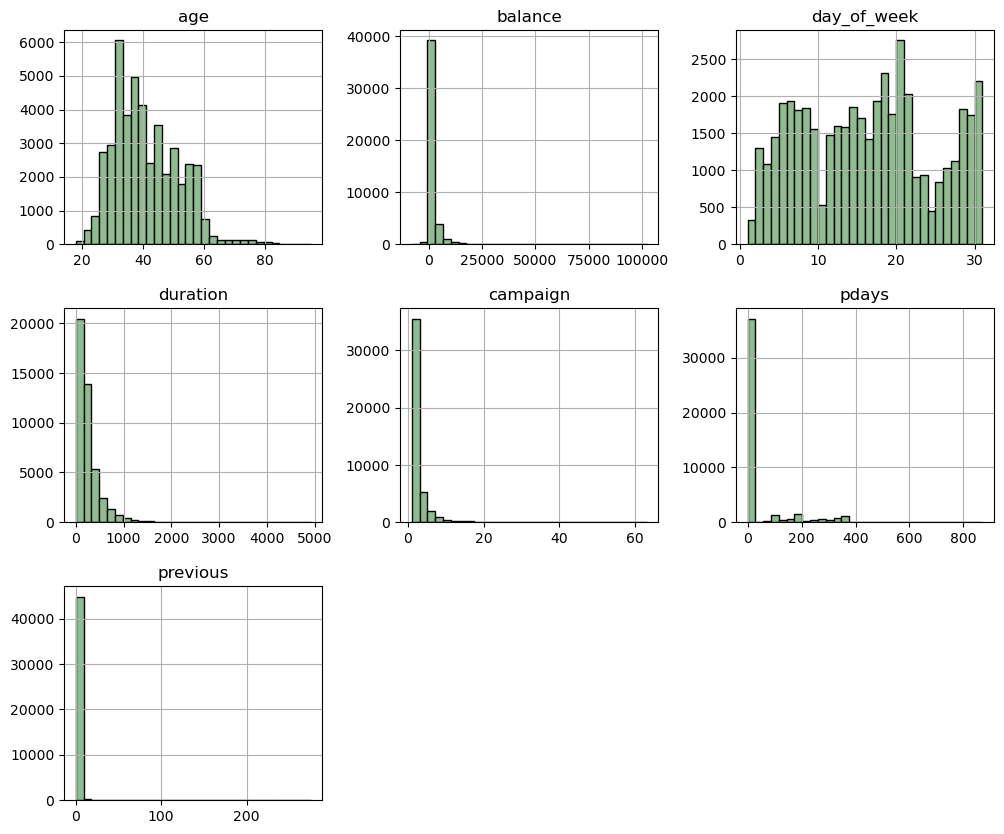

In [85]:
#histograms to analyze skew
X.hist(color="darkseagreen",figsize=(12, 10), bins=30, edgecolor='black')
plt.show()

Podemos ver que balance, duration, campaign and pdays tienen un sesgo muy notorio hacia la derecha, mientras age tiene uno, aunque igual notorio un poco mas disperso, previous se concentra casi totalmente en 1 solo valor y day of week esta por todos lados.

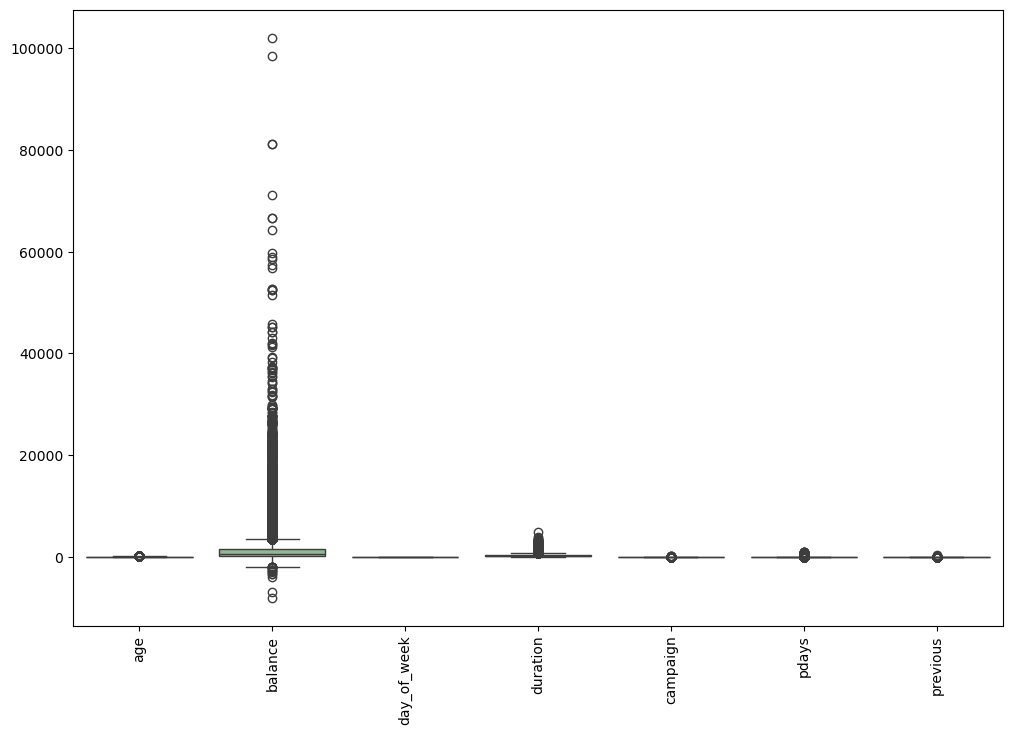

In [86]:
#boxplot to analyze atypical values
plt.figure(figsize=(12, 8))
sns.boxplot(color="darkseagreen",data=X)
plt.xticks(rotation=90)
plt.show()

Podemos ver que la variable balance tiene muchos valores atipicos, esto puede significar que muchas personas tienen saldos diferentes a lo comun en us cuenta, lo cual si lo pensamos tiene sentido, pues nadie tiene la misma cantidad de dinero en su cuenta de banco, igual esto lo trabajaremos mas adelante.
De igual manera las demas tienen uno que otro outlier pero pues no tan gigantisimo como balance.

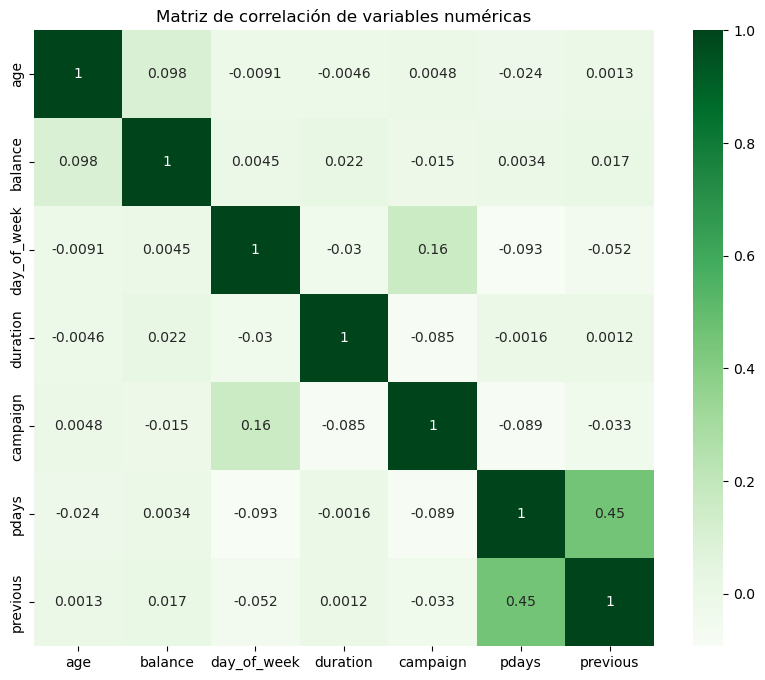

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(X[['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']].corr(), annot=True, cmap='Greens')
plt.title('Matriz de correlación de variables numéricas')
plt.show()

Vemos que ninguna de nuestras variables esta correlacionada entre si, por lo que mas adelante veremos otros metodos para seleccion de variables.

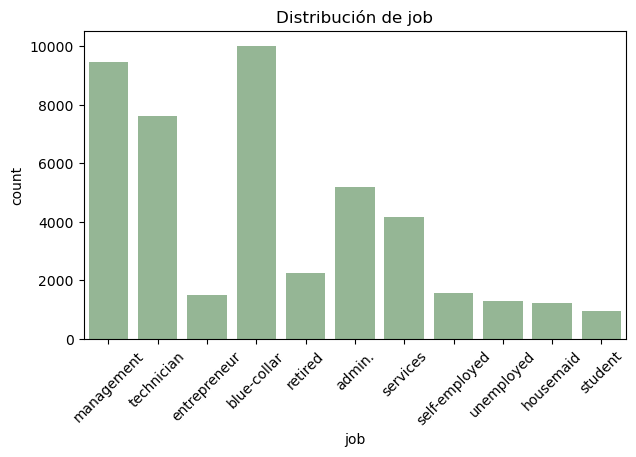

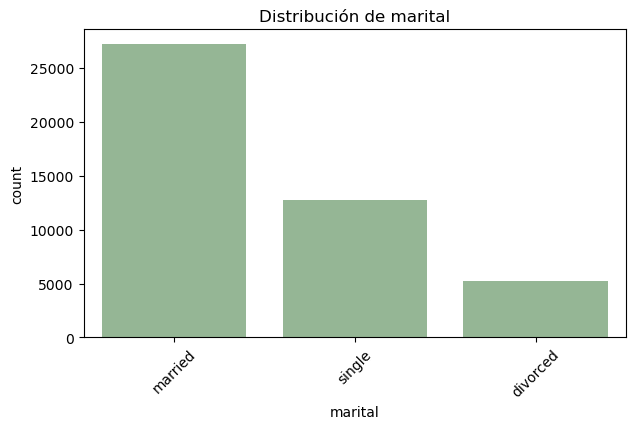

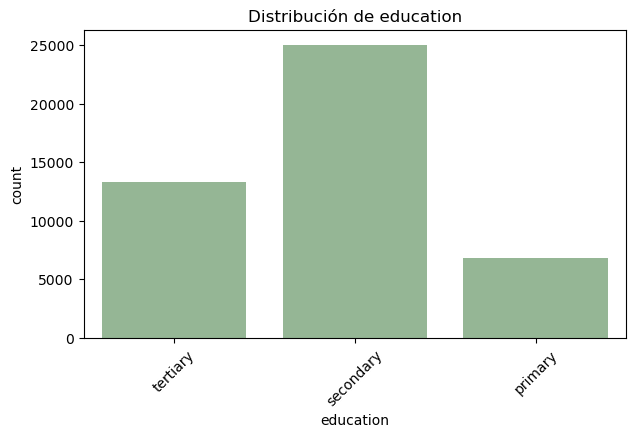

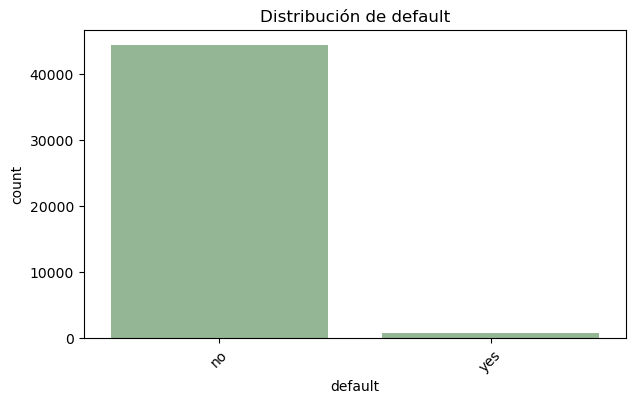

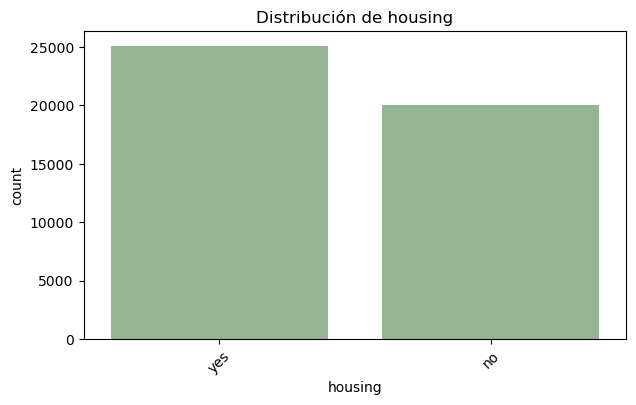

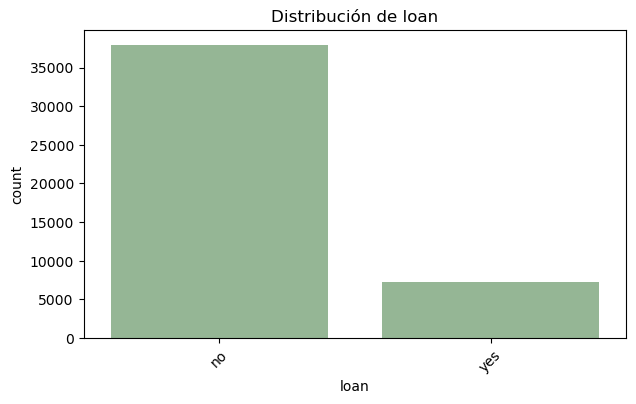

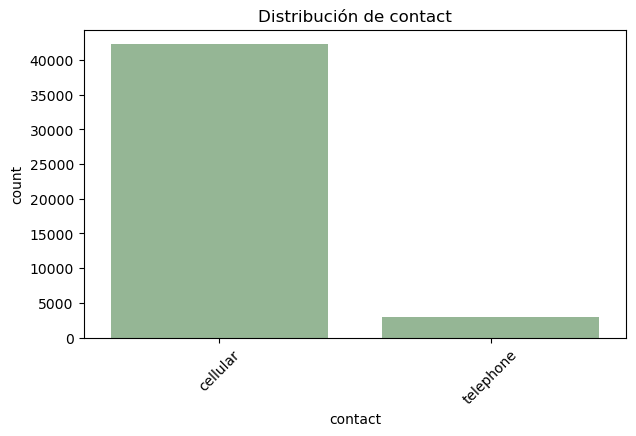

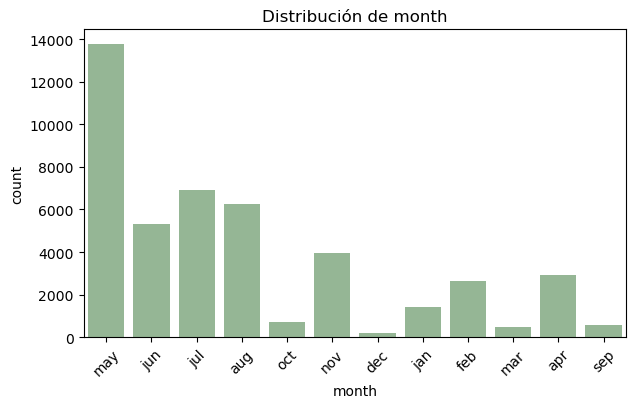

In [88]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']:
    plt.figure(figsize=(7, 4))
    sns.countplot(color="darkseagreen",data=X, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

Podemos ver que la mayoria de datos no estan tan mal, mas que default, que tiene mas no, loan que tiene mas no, contact que la mayoria prefiere celular y poutcome que lo domina failrue, lo que nos deja con una muestra pequena de las otras opciones para trabajar.

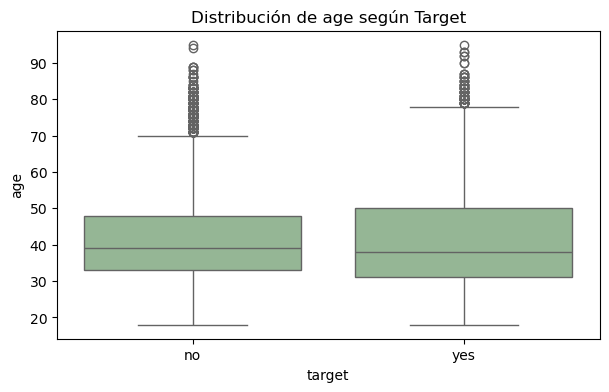

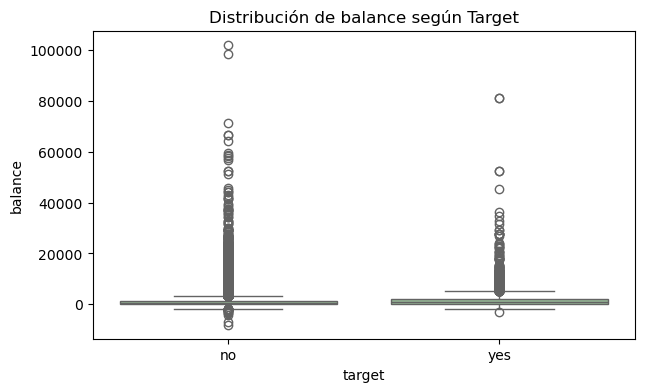

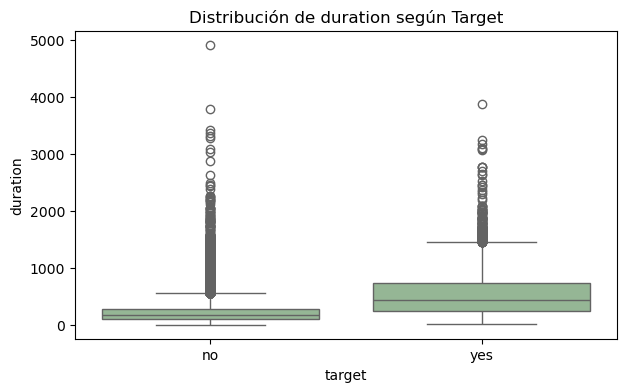

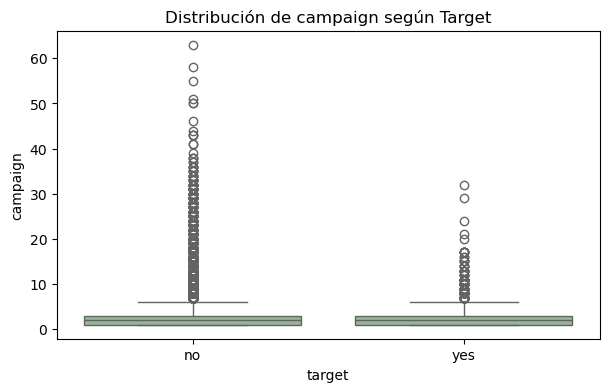

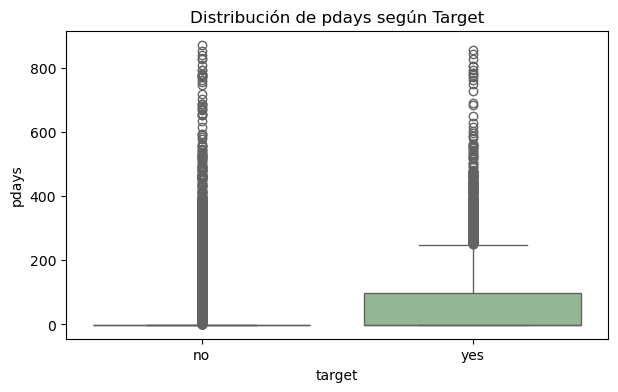

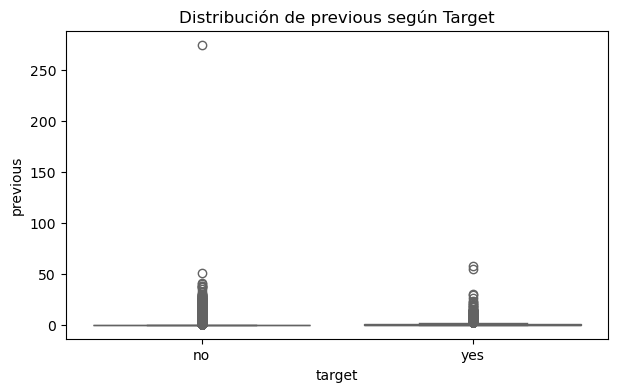

In [89]:
temp_df = X.copy()
temp_df['target'] = y  

for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(color="darkseagreen", data=temp_df, x='target', y=col)
    plt.title(f'Distribución de {col} según Target')
    plt.show()

Vemos que todos tienen valores atipicos y que los rectangulos de info son muy pequenos, despues de la transformaxion de datos veremos como cambia esto

___
### <font color= #bbc99f> Data Pre-processing</font>

In [90]:
from sklearn.preprocessing import LabelEncoder

for column in categoricas:
    label_encoder = LabelEncoder()
    X.loc[:, column] = label_encoder.fit_transform(X[column])
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0
4,33,1,2,1,0,1,0,0,0,5,8,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1942313295, random_state=8)


In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [93]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(36429, 15) (8782, 15)
(36429, 1) (8782, 1)


In [94]:
print(X.dtypes)

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
dtype: object


In [95]:
X_train.shape

(36429, 15)

In [96]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous
32280,37,4,2,1,0,504,1,0,0,16,0,555,1,-1,0
28907,33,4,1,2,0,1071,0,0,0,2,3,84,2,174,4
38255,39,1,2,1,0,10,1,0,1,15,8,23,3,346,10
10724,45,3,1,0,0,938,0,0,0,16,6,103,3,-1,0
28691,46,10,2,1,0,2052,0,0,0,30,4,428,1,-1,0


In [97]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

original_feature_names = ['age', 'job', 'marital', 'education', 'default', 
                          'balance', 'housing', 'loan', 'contact', 
                          'day_of_week', 'month', 'duration', 
                          'campaign', 'pdays', 'previous']

X_traindf = pd.DataFrame(X_train, columns=original_feature_names)

selector = RFE(model, n_features_to_select=10)  
selector.fit(X_train, y_train)
selected_features = X_traindf.columns[selector.support_]

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [99]:
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')


Escogi 10 variables para iniciar, conforme veamos el funcionamiento de los modelos se cambiara el numero tratando diferentes formas, pero asi pues ya tenemos un inicio para los modelos pues al tener 16 columnas puede que se complique un poco para el modelado
___

## <font color= #819161> Entrega 2: Eleccion de modelo </font>
___ 


Despues de realizar nuestro EDA creemos que el mejor modelo a utilizar seria XGBoost porque no solo combate el overfitting que notamos era muy recurrente, pero tambien suele tener un muy buen performance y velocidad, que es algo que creimos importante para la cantidad de datos que manejamos.

En este apartado vamos a comparar 4 tipos de modelos de clasificacion para ver cual es el mejor

### <font color= #bbc99f> Procesar Modelo de Clasificación

### <font color= #bbc99f> Random Forest


In [100]:
from sklearn.ensemble import RandomForestClassifier

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

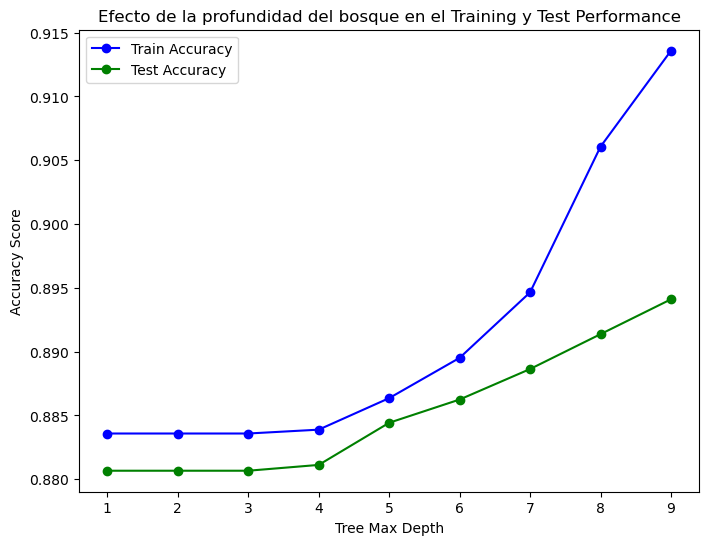

In [101]:
#graficamos la profundidad vs el accuracy
max_depths = range(1, 10)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_clas = RandomForestClassifier(max_depth=max_depth, random_state=42)
    tree_clas.fit(X_train, y_train)
    train_scores.append(tree_clas.score(X_train, y_train))
    test_scores.append(tree_clas.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

Podriamos utilizar entre el 5 y el 7 

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

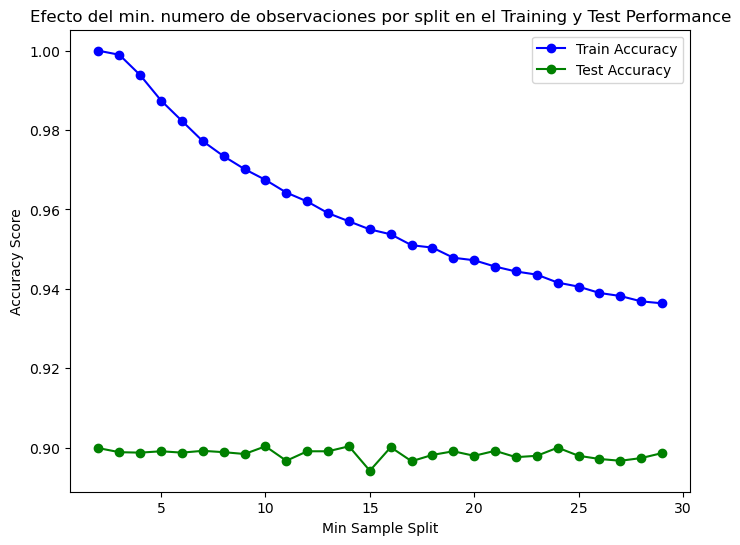

In [102]:
#graficamos el min_sample_split vs el accuracy
min_samples_splits = range(2, 30)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_clas = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    tree_clas.fit(X_train, y_train)
    train_scores.append(tree_clas.score(X_train, y_train))
    test_scores.append(tree_clas.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

Podriamos utilizar entre 10 a 20 para evitar el sobreajuste

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

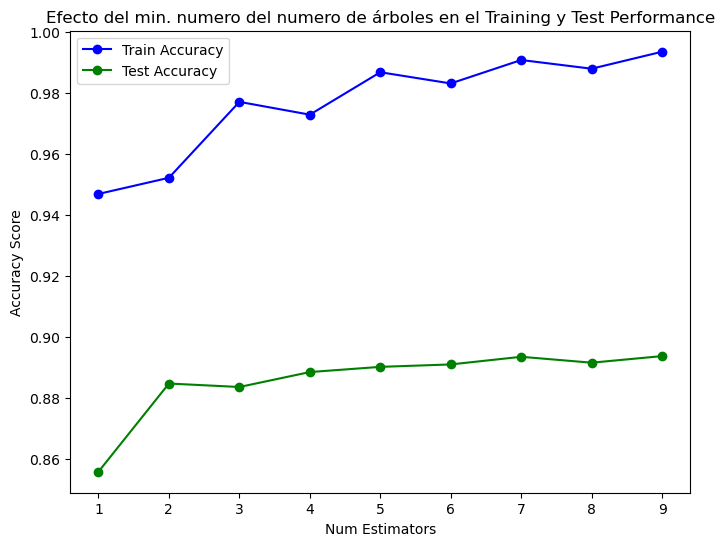

In [103]:
#graficamos el n_estimators vs el accuracy
n_estimators = range(1, 10)
train_scores = []
test_scores = []

for n_estimator in n_estimators:
    tree_clas = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    tree_clas.fit(X_train, y_train)
    train_scores.append(tree_clas.score(X_train, y_train))
    test_scores.append(tree_clas.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(n_estimators, test_scores, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Num Estimators')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero del numero de árboles en el Training y Test Performance')
plt.legend()
plt.show()

Podemos utilizar de 3 a 6

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': [1, 2, 5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [105]:
print(best_min_samples_leaf)

5


Utilizaremos 5 

In [106]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(criterion='gini',
                               min_samples_leaf=5,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(5, 7, 1), #profundidad máxima
                                'min_samples_split': range(10, 20, 1), #minimo numero de observaciones por split
                                'n_estimators': range(3, 6, 1)}, # número de árboles en el bosque
                  cv=2,
                  scoring='accuracy')
#Entrenamiento
gs.fit(X_train, y_train)

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(min_samples_leaf=5,
                                              random_state=0),
             param_grid={'max_depth': range(5, 7),
                         'min_samples_split': range(10, 20),
                         'n_estimators': range(3, 6)},
             scoring='accuracy')

In [107]:
#Imprimir parámetros óptimos
print(gs.best_params_)

{'max_depth': 6, 'min_samples_split': 15, 'n_estimators': 4}


Con esto ya sabemos que hiperparametros son los que mejor funcionan para este modelo y crearlo utilizando los mejores hiperparametros

In [108]:
#crear modelo usando parámetros óptimos
new_model = RandomForestClassifier(n_estimators=4,
                               criterion='gini',
                               max_depth=6,
                               min_samples_split=15,
                               min_samples_leaf=5,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entrenamiento
new_model.fit(X_train, y_train)

c:\Users\Aissa\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=4, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, f1_score

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  
y_test_encoded = le.transform(y_test)        

# Entrenar el modelo
new_model.fit(X_train, y_train_encoded)

# Hacer predicciones
y_pred = new_model.predict_proba(X_test)[:, 1]  
y_pred_class = (y_pred >= 0.5).astype(int)  

# Evaluación del modelo
accuracy = accuracy_score(y_test_encoded, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

recall = recall_score(y_test_encoded, y_pred_class)
f1 = f1_score(y_test_encoded, y_pred_class)

print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy	 Precision	 Recall
 0.887	 0.862	 0.887


### <font color= #bbc99f> XGBoost


Ya que tenemos las metricas del Random forest pasaremos a intentar con el XGBoost para ver si conseguimos mejorar estos numeros. Comenzaremos igual con la busqueda de hiperparametros

In [111]:
import xgboost as xgb

In [112]:
# param_grid = {
#     'max_depth': [3, 4, 5],          # Profundidad máxima del árbol.
#     'learning_rate': [0.1, 0.01, 0.05], # Tasa de aprendizaje.
#     'gamma': [0, 0.25, 1],           # Penalización de división de nodos.
#     'reg_lambda': [0, 1, 10],        # Regularización L2.
#     'scale_pos_weight': [1, 3, 5]    # Peso de la clase positiva (por desbalance).
# }

In [113]:
param_grid = {
    'max_depth': [5],              # Fijado en 4, basado en resultados anteriores.
    'gamma': [1],               # Fijado en 0.25.
    'reg_lambda': [1, 5, 8],   # Explorando nuevos valores alrededor de 10.
    'scale_pos_weight': [3]        # Fijado en 3.
}

In [114]:
y_train = y_train['y'].map({'no': 0, 'yes': 1})
y_test = y_test['y'].map({'no': 0, 'yes': 1})


In [115]:
print(y_train.unique())  
print(y_test.unique())   

[0 1]
[0 1]


In [116]:
optimal_params = GridSearchCV(
                            estimator=xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs=10,
                            cv=3)

optimal_params.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)],
                  verbose=False)
optimal_params.best_params_

{'gamma': 1, 'max_depth': 5, 'reg_lambda': 8, 'scale_pos_weight': 3}


#### Ronda 1:
{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 1,
 'scale_pos_weight': 3}

Para la ronda 2 solamente exploramos nuevos valores de reg lamba y vemos que conseguimos uno diferente entonces estos seran los hiperparametros escogidos:

{'gamma': 1, 'max_depth': 5, 'reg_lambda': 8, 'scale_pos_weight': 3}

In [117]:
modelo = xgb.XGBClassifier(objective='binary:logistic',
                            seed=99,
                           gamma=1,
                           max_depth=5,
                           reg_lambda=8,
                           scale_pos_weight=3)

modelo.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)],
                  verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score)


yhat = modelo.predict(X_test)
accu = accuracy_score(y_test,yhat)
prec = precision_score(y_test,yhat)
reca = recall_score(y_test,yhat)
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.886	 0.515	 0.737


### <font color= #bbc99f> Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7571  163]
 [ 835  213]]
89.0


ahora que tenemos un accuracy de 89% intentamos hacer una optimizacion en la seleccion de nuestros parametros

In [120]:
from sklearn.linear_model import LogisticRegression

# Lista de hiperparámetros para probar
C_values = [0.01, 0.1, 1, 10, 100]  # Regularización
solvers = ['liblinear', 'saga']  # Algoritmos rápidos y compatibles
max_iters = [100, 200, 500]  # Número de iteraciones

best_score = 0
best_params = {}

for C in C_values:
    for solver in solvers:
        for max_iter in max_iters:
            try:
                logmodel = LogisticRegression(C=C, solver=solver, max_iter=max_iter)
                logmodel.fit(X_train, y_train)

                score = logmodel.score(X_train, y_train)

                if score > best_score:
                    best_score = score
                    best_params = {'C': C, 'solver': solver, 'max_iter': max_iter}

            except Exception as e:
                print(f"Error con C={C}, solver={solver}, max_iter={max_iter}: {e}")

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntuación en validación (entrenamiento):", best_score)

best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)
logpred = best_model.predict(X_test)



Mejores parámetros encontrados: {'C': 1, 'solver': 'liblinear', 'max_iter': 100}
Mejor puntuación en validación (entrenamiento): 0.8915973537566225


In [121]:

from sklearn.metrics import (accuracy_score,precision_score,recall_score)

yhat = best_model.predict(X_test)
accu = accuracy_score(y_test,yhat)
prec = precision_score(y_test,yhat)
reca = recall_score(y_test,yhat)
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.886	 0.568	 0.203


### <font color= #bbc99f> SVC

In [122]:

from sklearn.svm import SVC

# Step 1: Define the model
svc = SVC()

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]} #por lo general son valores menores a 1

In [123]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

modelo = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 50, 'gamma': 0.005}
Best Training Accuracy: 0.8894013011611629


In [124]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score)

yhat = modelo.predict(X_test)
accu = accuracy_score(y_test,yhat)
prec = precision_score(y_test,yhat)
reca = recall_score(y_test,yhat)
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.884	 0.567	 0.105


### <font color= #bbc99f> Discusión de los resultados


<p style="text-align: justify;">

Nuestra hipótesis al comenzar el modelado, fue que XGBoost iba a ser el mejor modelo. Asumimos esto porque en el EDA pensamos que tenemos muchos datos, es un modelo sensible asi que fue indispensable la estandarizacion que hicimos en la primer entrega. Al final nos enteramos que fue el segundo mejor y que Arboles de decision lo habia superado

1. Decission Trees:, tuvieron un buen desempeño cuando lo corrimos Creemos fue el mejor modelo que tuvimos, ya que fue superior en todas las metricas constantemente, demoro un tiempo razonable y fue muy confiable.

2. XGBoost: Este Modelo resulto muy complejo para nosotros, pero al fuinal de el proyecto tuvo un desempeño ligeramente mas bajo que decission trees, lo que la sigue haciendo una muy buena opcion.

3. Logistic RegressionÑ Con este modelo hubo un desempeño medianamente bueno, pues bajo el desempeño en las metricas comparado con el de decission Trees y XGBoost, bajo en la mayoria de las estadisticas de medicion, sin embargo fue muy rapido de correr.

4. SVC: A pesar de que todos los modelos fueron relativamente buenos, este fue el peor, especialmente en Recall, que si consideramos era una metrica importante en nuestro tipo de modelo. Un factor muy importante, es que este es el modelo que mas tardo en correr, mucho mas que los demas, pero gracias al equipo que utilizamos solo tardo 10 minutos esta vez, pero en otras computadoras nos fue imposible despues de varios minutos.

Las variables mas importantes como pdays las logramos identificar en el EDA y se repitio para este modelado, En cuanto a las medidas de performance, creemos que es mejor perder un falso negativo antes que un falso positivo, y por esto y el balance creemos que la mejor medida seria accuracy seguida de presion, por eso nuestras conclusiones anteriores de cada modelo.
